In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
import requests

# pd.options.display.mpl_style = 'default'
plt.rcParams['figure.figsize'] = (8, 8)

## Getting the data

In [2]:
df = pd.DataFrame.from_csv("professors.csv", encoding='utf-8')

In [3]:
df.head(5)

,Name,Start,Years Active,Year,Current_Citations,Age,Last_citations,Last2_citations,Last3_citations,Last4_citations,Last5_citations
0,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2003,3,0,NaN,NaN,NaN,NaN,NaN
1,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2004,23,1,3.0,NaN,NaN,NaN,NaN
2,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2005,12,2,23.0,3.0,NaN,NaN,NaN
3,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2006,38,3,12.0,23.0,3.0,NaN,NaN
4,Paulo Blikstein (B0cNWzEAAAAJ),2003,13,2007,49,4,38.0,12.0,23.0,3.0,NaN


## Quantile Analysis

In [4]:
# This creates a pivot table with Authors as columns, in order to do some exploratory plots
byyear = df.pivot(index='Age', columns='Name', values='Current_Citations')

In [6]:
totals = byyear.cumsum()

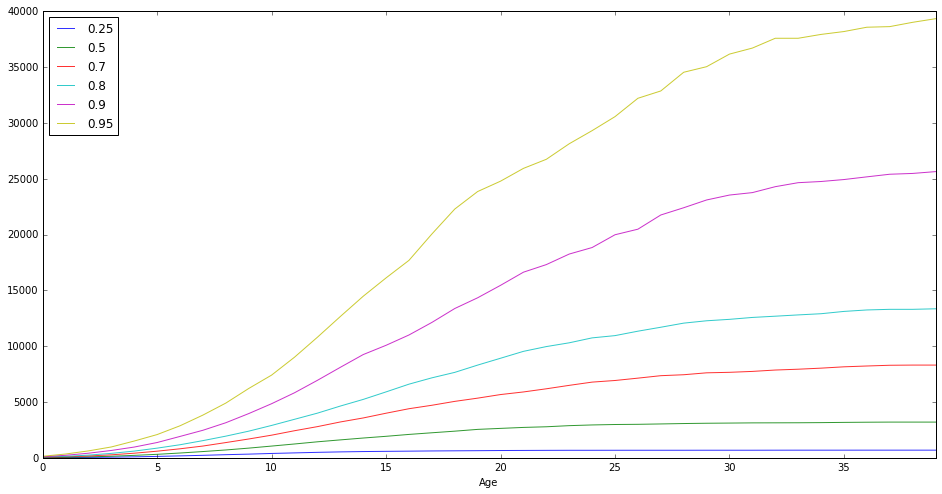

In [7]:
byyear_sum = totals.fillna(method='pad').transpose()

quantiles = [0.25, 0.5, 0.7, 0.8, 0.9, 0.95]
byyear_sum.quantile(quantiles).transpose().plot(logy=False, alpha=0.8,figsize = (16,8))

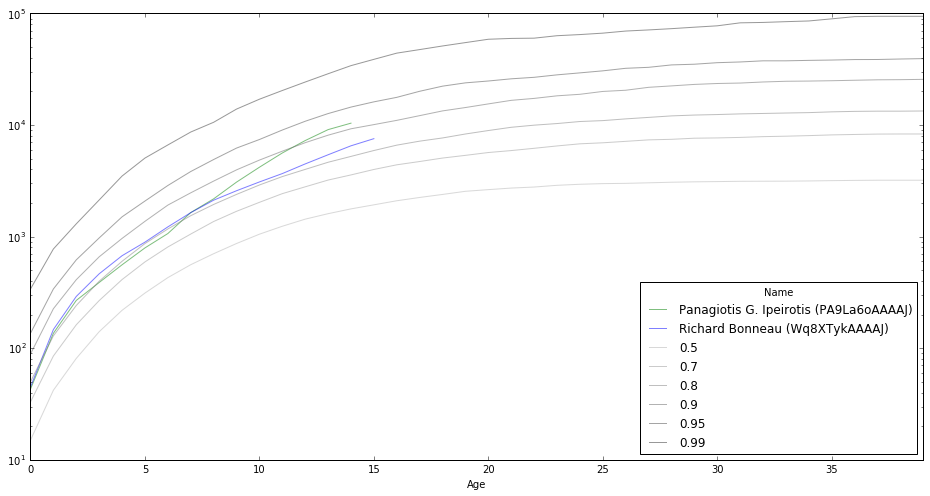

In [8]:
p = byyear[["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)", "Richard Bonneau (Wq8XTykAAAAJ)"]].cumsum()
# "Jon Kleinberg (VX7d5EQAAAAJ)", "Jure Leskovec (Q_kKkIUAAAAJ)", 

quantiles = [0.5, 0.7, 0.8, 0.9, 0.95, 0.99]
q = byyear_sum.quantile(quantiles).transpose()
m = pd.merge(p, q, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False,)
m.plot(figsize = (16,8), legend=True, logy=True, color=['g','b','0.7','0.6','0.5','0.4','0.3','0.2','0.1'], alpha=0.5)

## Comparative performance ranking

In [9]:
rank = byyear.rank(axis=1, pct=True)
rank.T

Age,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Name,,,,,,,,,,,,,,,,,,,,,
"""Adam Buchwald"" (XpEr2UEAAAAJ)",0.233589,0.075063,0.083244,0.139622,0.105009,0.042530,0.097575,0.067682,0.099352,0.103902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.-H. Alissa Park (jaoxVkQAAAAJ),0.306739,0.182730,0.238859,0.271576,0.266905,0.245911,0.254291,0.243155,0.293606,0.293893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AYMEN AWAD ALIAN (zB1r700AAAAJ),0.117493,0.103905,0.101426,0.160663,0.321109,0.199927,0.131157,0.166024,0.177863,0.146098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Andalman (XmOXc8S6gUsC),0.414630,0.424758,0.357576,0.383203,0.376565,0.462923,0.410821,0.388932,0.602590,0.672180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Chatterji (eKqVx84AAAAJ),0.364176,0.395557,0.522638,0.612696,0.671199,0.666848,0.718284,0.702661,0.704573,0.698049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron D. Gitler (-LPp6oUAAAAJ),0.658170,0.814583,0.826916,0.792083,0.817531,0.819884,0.788993,0.827806,0.874140,0.884648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gerow (oo1jM2YAAAAJ),0.180866,0.075063,0.027629,0.110556,0.142576,0.076518,0.102425,0.081951,0.026507,0.038804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron M Newman (gODP8bYAAAAJ),0.233589,0.411680,0.591444,0.568295,0.628086,0.674846,0.813060,0.776514,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron M. Lindenberg (VWIT1GwAAAAJ),0.532996,0.446614,0.759893,0.350036,0.266905,0.433297,0.448507,0.537794,0.436261,0.426209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
trank = rank.T
trank[trank[5] > 0.9]

Age,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Name,,,,,,,,,,,,,,,,,,,,,
Abraham Ulman (y9dLrDcAAAAJ),0.940293,0.943210,0.910339,0.940264,0.924866,0.938931,0.930224,0.926919,0.927357,0.906701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Anticevic (QVS1AfkAAAAJ),0.390363,0.547832,0.560250,0.745542,0.847943,0.910578,0.935075,0.929425,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex Ruthenburg (Sadz1uwAAAAJ),0.647870,0.879434,0.935472,0.938481,0.936494,0.916394,0.874440,0.816429,0.769527,0.730704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alexander Eckehart Urban (IGyIeMsAAAAJ),0.820705,0.849875,0.938859,0.980029,0.975671,0.970193,0.987687,0.989202,0.983812,0.973282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alexey Vikhlinin (E4cgK1cAAAAJ),0.812151,0.830168,0.775579,0.878210,0.875313,0.919484,0.917910,0.897416,0.900040,0.819550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alfred Aho (gb2r2ssAAAAJ),0.991969,0.988893,0.980392,0.973609,0.961360,0.943475,0.925000,0.908600,0.888304,0.865140,...,0.782991,0.785467,0.786008,0.779343,0.787234,0.775758,0.761905,0.770492,0.708738,0.647727
Amartya Sen (sLNFo0sAAAAJ),0.996858,0.995342,0.994296,0.986448,0.984436,0.979280,0.976493,0.968762,0.956698,0.958015,...,1.000000,0.996540,0.987654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amir Safavi-Naeini (QviK0DEAAAAJ),0.688024,0.926012,0.975045,0.979672,0.973166,0.970920,0.942910,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anat Levin (9aw_QGAAAAAJ),0.791376,0.908456,0.899465,0.916726,0.917352,0.931116,0.936194,0.920555,0.917442,0.914334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# This examines the probability of evolution for people that 
# in a given year of their career fell within a range of performance
year = 5
lower_bound = 0.85
upper_bound = 0.95
trank = rank.transpose()
condition = (trank[year] <upper_bound) & (trank[year] > lower_bound)

selection = trank[ condition ]
selection

Age,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Name,,,,,,,,,,,,,,,,,,,,,
Abraham Ulman (y9dLrDcAAAAJ),0.940293,0.943210,0.910339,0.940264,0.924866,0.938931,0.930224,0.926919,0.927357,0.906701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Galinsky (_KUMofAAAAAJ),0.798883,0.797743,0.863102,0.811163,0.811807,0.881134,0.897388,0.923255,0.946985,0.959712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam de la Zerda (fv1RjgEAAAAJ),0.601082,0.882479,0.899465,0.894080,0.890698,0.897128,0.834888,0.789433,0.816269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Anticevic (QVS1AfkAAAAJ),0.390363,0.547832,0.560250,0.745542,0.847943,0.910578,0.935075,0.929425,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alan Aspuru-Guzik (Ag_6KEgAAAAJ),0.658170,0.571480,0.560250,0.582561,0.753488,0.888222,0.927239,0.952179,0.938891,0.951230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto Salleo (5XjscEAAAAAJ),0.720321,0.777857,0.855793,0.847539,0.884258,0.853326,0.827612,0.809873,0.813841,0.874258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex Ruthenburg (Sadz1uwAAAAJ),0.647870,0.879434,0.935472,0.938481,0.936494,0.916394,0.874440,0.816429,0.769527,0.730704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alexander Ljungqvist (t966tjcAAAAJ),0.720321,0.775528,0.767558,0.902639,0.844365,0.855325,0.872015,0.857887,0.845002,0.848176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alexey Vikhlinin (E4cgK1cAAAAJ),0.812151,0.830168,0.775579,0.878210,0.875313,0.919484,0.917910,0.897416,0.900040,0.819550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
# predictions = trank[ condition ].rank(na_option='keep', pct=True).transpose()
predictions = trank[ condition ].quantile(quantiles).transpose()
predictions


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,0.05,0.1,0.25,0.5,0.75,0.9,0.95
Age,,,,,,,
0,0.491620,0.561976,0.703911,0.824895,0.932786,0.968994,0.983450
1,0.577123,0.640129,0.773200,0.864923,0.926102,0.964708,0.979792
2,0.629020,0.731373,0.809447,0.881996,0.932175,0.956471,0.965080
3,0.730795,0.782097,0.841031,0.896933,0.926712,0.949964,0.960788
4,0.813059,0.830733,0.861538,0.899463,0.925492,0.945617,0.953292
5,0.855107,0.859869,0.874773,0.899673,0.924573,0.939368,0.944493
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


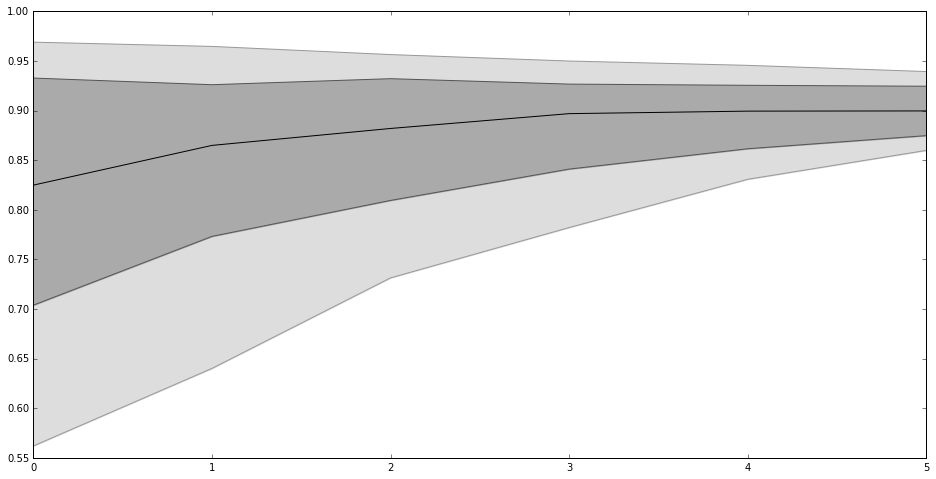

In [13]:
plt.figure(figsize = (16,8))

plt.plot(predictions[0.1], color='#999999')
plt.plot(predictions[0.25], color='#555555')
plt.plot(predictions[0.5], color='#000000')
plt.plot(predictions[0.75], color='#555555')
plt.plot(predictions[0.9], color='#999999')

plt.fill_between(predictions.index,predictions[0.1],predictions[0.9],color='#DDDDDD')
plt.fill_between(predictions.index,predictions[0.25],predictions[0.75],color='#AAAAAA')



### Compare Ranks of Researchers over Time

In [ ]:
compare = [
    # "Viral Acharya (iZAsYLgAAAAJ)",
    # "Sinan Aral (E2uuNVoAAAAJ)",
    # "Natalia Levina (ApxF7d8AAAAJ)",
    # "Andrei Shleifer (BV8WIV8AAAAJ)",
    # "Jon Kleinberg (VX7d5EQAAAAJ)", 
    # "Jure Leskovec (Q_kKkIUAAAAJ)", 
    "Panagiotis G. Ipeirotis (PA9La6oAAAAJ)",
    # "Claudio T. Silva (YIwiAAsAAAAJ)",
    # "Alexander Tuzhilin (vs4zs0cAAAAJ)",
    # "Mor Naaman (IeqjwlIAAAAJ)",
    # "Foster Provost (-Km63D4AAAAJ)",
    # "Anindya Ghose (oQHsB5kAAAAJ)",
    "John P. Dickerson (QgDpfCQAAAAJ)",
    #"Richard Bonneau (Wq8XTykAAAAJ)"
    # "Lasse Heje Pedersen (XhSFeucAAAAJ)",
    # "David Rand (C0ANojIAAAAJ)",
    "John Horton (L_O2kH0AAAAJ)",
    # "andrew Y ng (JgDKULMAAAAJ)"
    # "Prasanna Tambe (UXmpersAAAAJ)",
    # "Arun Sundararajan (M0OB5XQAAAAJ)",
    # "Kristina McElheran (Xjg_fR4AAAAJ)",
    # "Xinxin Li (Knp-_9wAAAAJ)",
    # "Kannan Karhik (E0ihamsAAAAJ)",
    "Evangelos E. Papalexakis (2P1kinAAAAAJ)",
    # "Alex Beutel (zEYMVR0AAAAJ)"
]

rank[compare].plot()

## Average Career Ranking

In [ ]:
leaderboard = rank.mean(axis=0, skipna=True).sort_values(ascending =False)
leaderboard.head(50)

In [ ]:
print leaderboard["Panagiotis G. Ipeirotis (PA9La6oAAAAJ)"]

In [ ]:
# Top junior researchers, with less than 10 years of activity

career_length = byyear.count(axis=0)
report = pd.merge (pd.DataFrame(leaderboard), pd.DataFrame(career_length),left_index=True, right_index=True, sort=True, copy=True, how='inner')
report.sort_values(by='0_x', ascending =False)[report['0_y']<=10]